<a href="https://colab.research.google.com/github/MatthewsBorba/Graficos-Matplotlib/blob/main/An%C3%A1lise_e_Explora%C3%A7%C3%A3o_de_dados_do_navio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise e Exploração de dados do navio Titanic

* Matthews Borba Correia de Brito
* matthewsbcbrito@gmail.com

In [2]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.3 MB/s eta 0:00:00


In [3]:
!pip install tweepy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Imoportando as bibliotecas do Python
import numpy as np # Vetor e Matriz Multidimencional
import scipy as sp # Estatisticas e Matematica
import pandas as pd # Excel dentro do Colab ou seja faz tudo nele.
import matplotlib.pyplot as plt # Criar Gráficos e objetos visualização de dados 
import seaborn as sns # Criar Gráfico só que mais bonitos em HTML5.

In [5]:
# Lendo o arquivo csv
df_titanic = pd.read_csv("Titanic.csv")

In [7]:
# Exibindo as primeiras linhas do DataFrame Titanic
df_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
# Exibindo as ultimas linhas do DataFrame Titanic
df_titanic.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
403,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,0,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


(array([107.,   0.,   0.,   0.,  93.,   0.,   0., 218.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

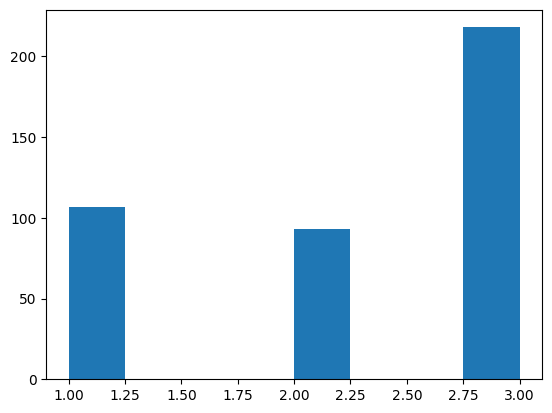

In [9]:
# Usando Matplotlib para desenhar um histograma para  coluna PClass a classe social da pessaoa do Titanic
plt.hist(df_titanic['Pclass'],bins=8)

(array([ 20.,  41., 114.,  68.,  45.,  28.,  14.,   2.]),
 array([ 0.17   ,  9.64875, 19.1275 , 28.60625, 38.085  , 47.56375,
        57.0425 , 66.52125, 76.     ]),
 <BarContainer object of 8 artists>)

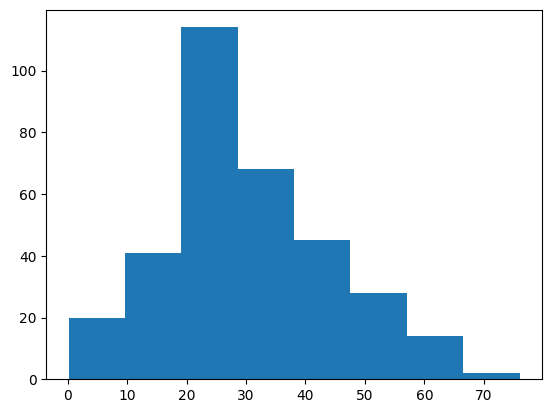

In [10]:
plt.hist(df_titanic['Age'],bins=8)

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 <BarContainer object of 9 artists>)

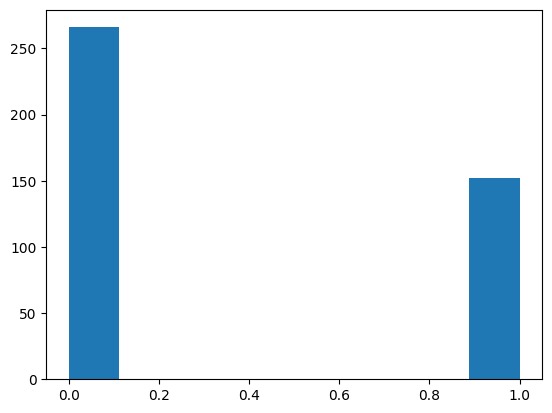

In [11]:
plt.hist(df_titanic['Survived'],bins=9)

<Axes: ylabel='Age'>

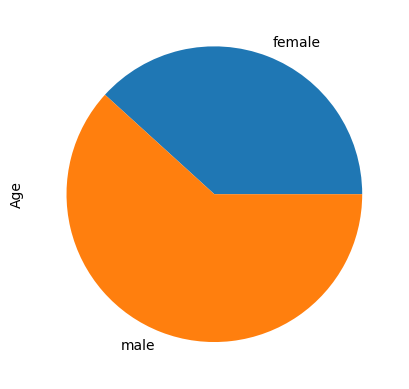

In [12]:
# Criando um grafico de "Pizza"  em sexo e idade das pessoas do titanic
df_titanic.groupby(['Sex'])['Age'].count().plot(kind='pie')

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:76: UserWarning: Data contain nans but no nan-aware version of `size` found
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:76: UserWarning: Data contain nans but no nan-aware version of `size` found
  warnings.warn(msg, UserWarning)


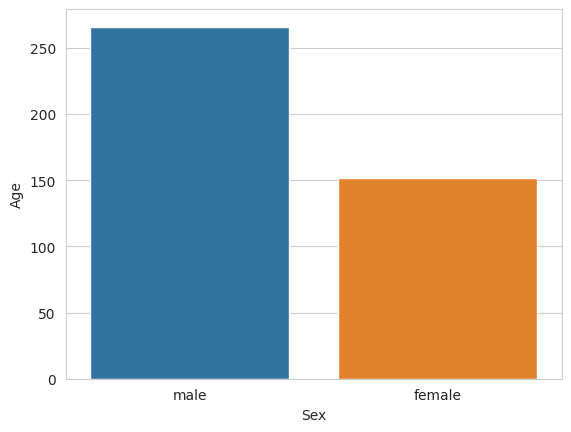

In [13]:
# O uso do seaborn para mostrar o Gráfico de barras
sns.set_style("whitegrid")
ax = sns.barplot(x='Sex',y = 'Age', data=df_titanic, estimator=len)